 Customer Classification using Unsupervised Modelling in R

# Define the Question

## Specify the Question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer group.

## Metric of Success

Creating insights that will help the marketing team know what they need to improve to increase their sales
Create clusters that groups customers in order to improve their marketing strategy for different groups of customers  

## Context

Kira Plastinina is a brand by a fashion designer and entrepreneur Kira Plastinina.The brand is sold through retails stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines and Armenia.
The brand has more than 54 outlets. 
The brand has done a couple of fashion show displaying their products

## Experimental Design

This are the steps i shall incorporate:
1) Business Understanding
2) Data Understanding
3) Data preparation
4) Exploratory Data Analysis
5) Modelling 
6) Conclusion
7) Recommendation 

# Variables 

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Upload the dataset 

In [2]:
#load the dataset
df = read.csv("online_shoppers_intention.csv")
#read the data
head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:
#read the data
tail(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [4]:
#Get details on each column
summary(df)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [5]:
#Check for the number of row and columns
str(df)
#The data is stored in a dataframe
#It consists of 12330 rows and 36 columns 
#We have 24 interger columns
#we have 7 numeric columns 
# 1 column is a factor
#The rest are logical (2)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [6]:
#looking for unique values in columns
unique(df$Administrative)
unique(df$Informational)
unique(df$ProductRelated)
unique(df$SpecialDay)
unique(df$TrafficType )
unique(df$Weekend )
unique(df$Revenue )

[1]  0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 NA 24 22 21 20
[26] 23 27 26

[1]  0  1  2  4 16  5  3 14  6 12  7 NA  9 10  8 11 24 13

[1]   1   2  10  19   3  16   7   6  23  13  20   8   5  32   4  45  14  52
 [19]   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21  51
 [37]  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63  87
 [55]  40  33  54  64  75  39 111  81  61  47  44  88 149  41   0  79  66  43
 [73] 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 [91] 113  89  65  60  NA 104 129  77  74  93  76  72 194 140 110 132 115  73
[109] 328 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187
[127] 112 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108
[145] 119  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99
[163] 362 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121
[181] 107 305 199 439 223 230 280 377 310 158 486 153 139 182 221 229 216 170
[199] 202 346 274 240 162 123 211 227 168 161 429 686 167 518 256 255 358 213
[217] 191 282 155 138 246 237 271 171 414 219 262 409 243 241 197 449 143 188
[235] 391 238 152 165 293 174 584 164 311 340 250 200 385 292 232 251 517 225
[253] 169 309 235 501 224 275 318 144 397 343 245 186 337 351 166 349 423 359
[271] 163 147 264 312 226 324 266 260 338 272 534 470 207 218 326 190 304 205
[289] 233 401 177 330 286 247 357 315 231 339 283 374 248 279 281 234 261 290
[307] 336 378 254 183 210 192

[1] 0.0 0.4 0.8 1.0 0.2 0.6

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20

[1] FALSE  TRUE

[1] FALSE  TRUE

# Data Cleaning

## Validity

In [75]:
#create a dataframe without the categorical variables 
num_int <- df[ , -which(names(df) %in% c("Month","VisitorType","Weekend","Revenue"))]
head(num_int)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


Warning message in bxp(list(stats = structure(c(1, 2, 2, 3, 4), .Dim = c(5L, 1L), class = structure("integer", .Names = "")), :
"some notches went outside hinges ('box'): maybe set notch=FALSE"Warning message in bxp(list(stats = structure(c(1, 2, 2, 4, 7), .Dim = c(5L, 1L), class = structure("integer", .Names = "")), :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

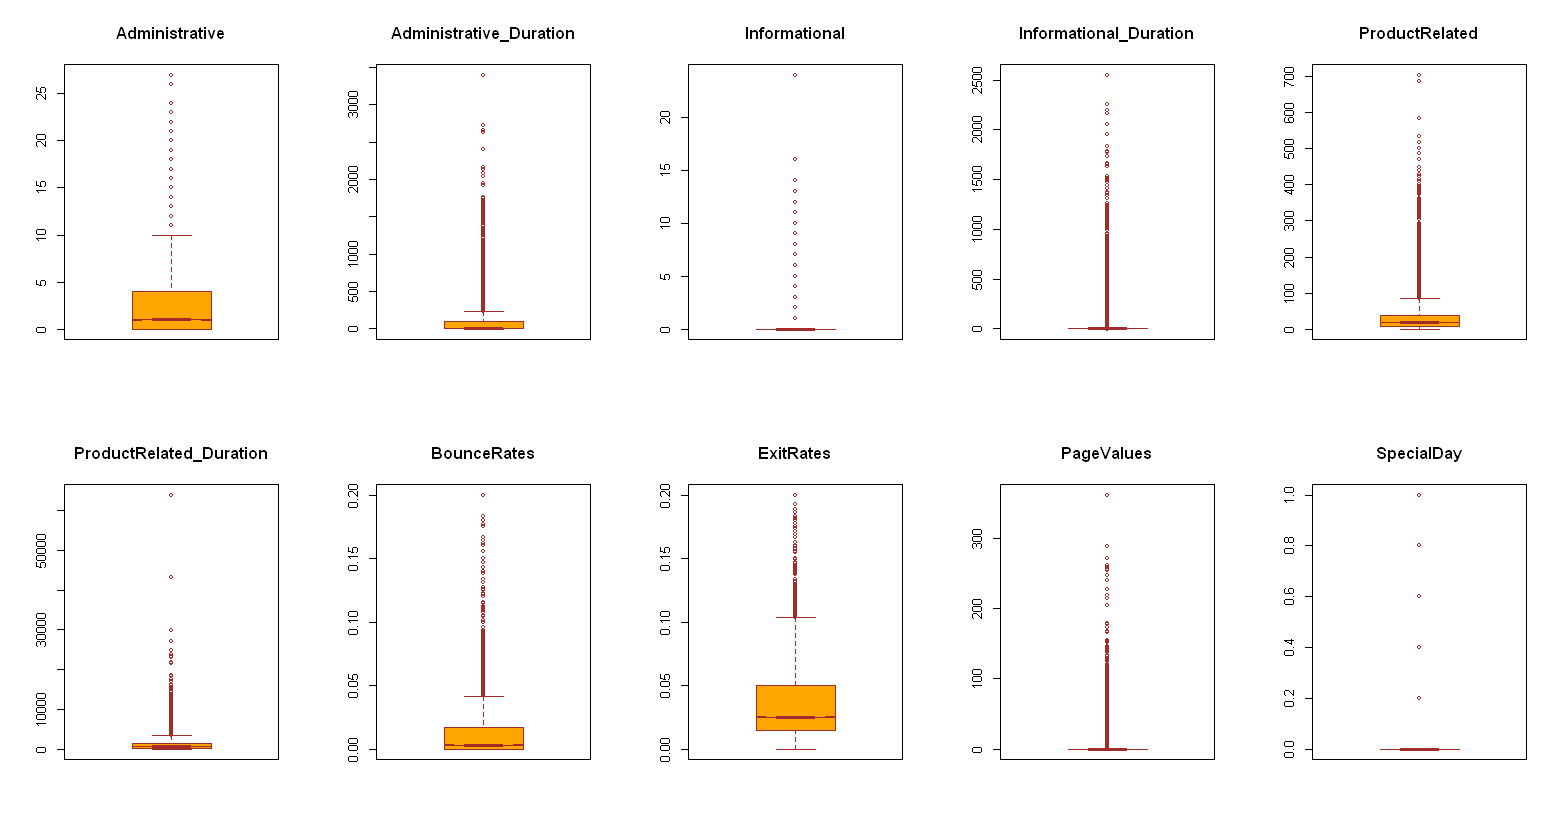

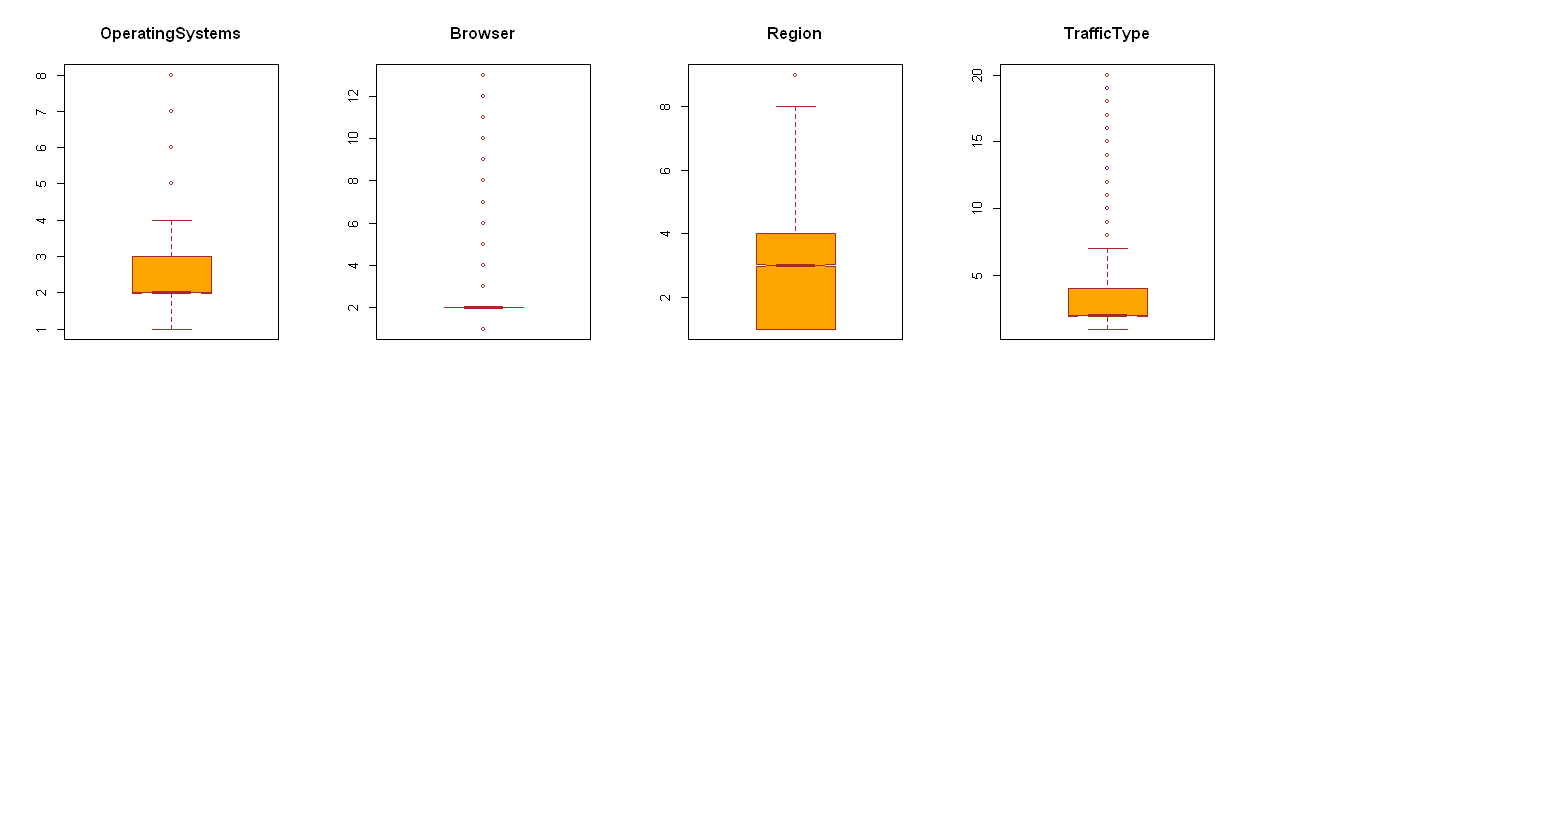

In [76]:
#Check for outliers in numeric columns
par(mfrow=c(2,5))
for (i in 1:length(num_int)) {
        boxplot(num_int[,i], main=names(num_int[i]), type="l",col = "orange",
border = "brown",
horizontal = FALSE,
notch = TRUE)

}

#the dataset consists of so  many outliers 


## Completeness

In [8]:
install.packages("DataExplorer")


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maureen M\AppData\Local\Temp\RtmpMXRrIj\downloaded_packages


In [9]:
library(DataExplorer)

Warning message:
"package 'DataExplorer' was built under R version 3.6.3"

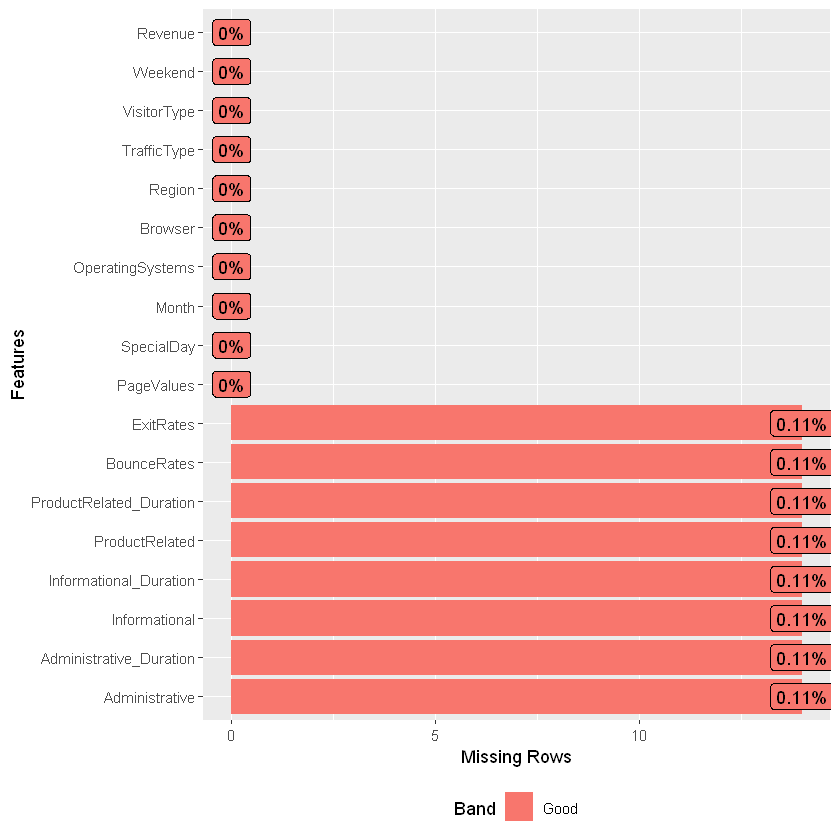

In [10]:
#validate we do not have missing data points in the columns
plot_missing(df)

#Visualizing missing data
#The dataset has missing vakues for the columns with 0.11%

In [11]:
#See the number of rows (calculated)
colSums(is.na(df))

#14 rows have missing data

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [12]:
#Drop the missing data
df1 <- na.omit(df) 
head(df1)
#we have dropped all the rows with missing data
#dropping this rows should not affect our analysis since we are still left we with many rows to work with 

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [13]:
#confirm all rows with missing data have been droppped 
colSums(is.na(df1))
#our dataset is now complete

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [14]:
#check the number of remaining rows 
str(df1)
#We have 12316 rows and 18 columns 

'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

## Consistency

In [15]:
#Check for any duplicates 
#duplicated(df1)
anyDuplicated(df1)
#There exists duplicates in the data
#However,it is could not be an error since this are entries made based on consumer behavious
#It is likely that there could be a coincidence in their behaviour 

[1] 159

# Exploratory Data Analysis

## Univariate Analysis

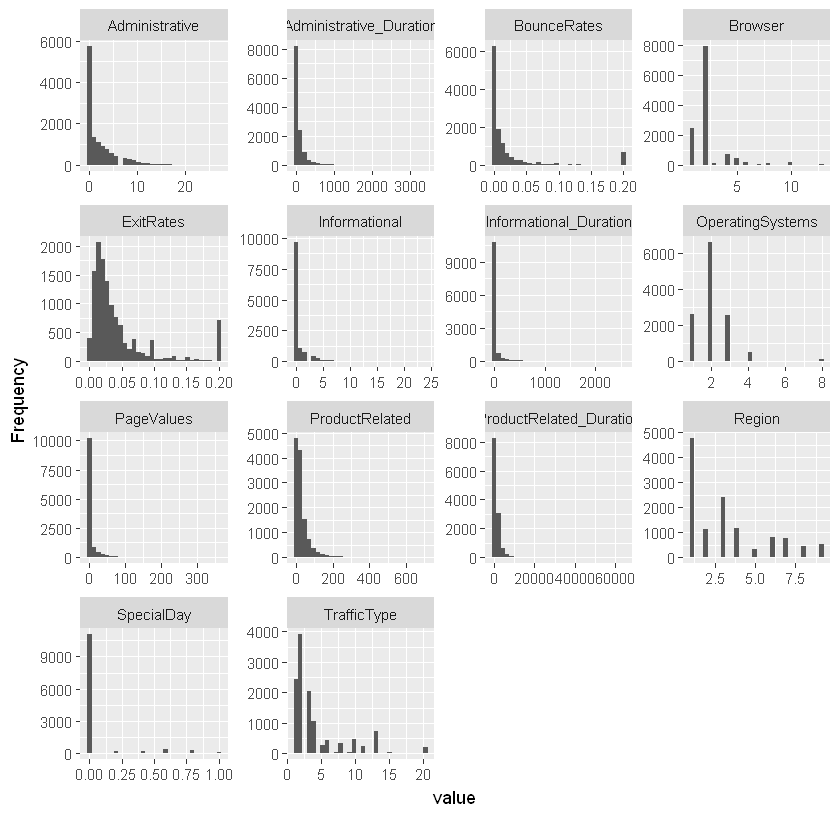

In [16]:
#All the columns are skewed to the right 
plot_histogram(df1)

## Bivariate Analysis 

In [17]:
#install ggplot2 to plot the graphs
install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.2.1  3.3.0             FALSE



installing the source package 'ggplot2'



In [18]:
#read the library
library(ggplot2)

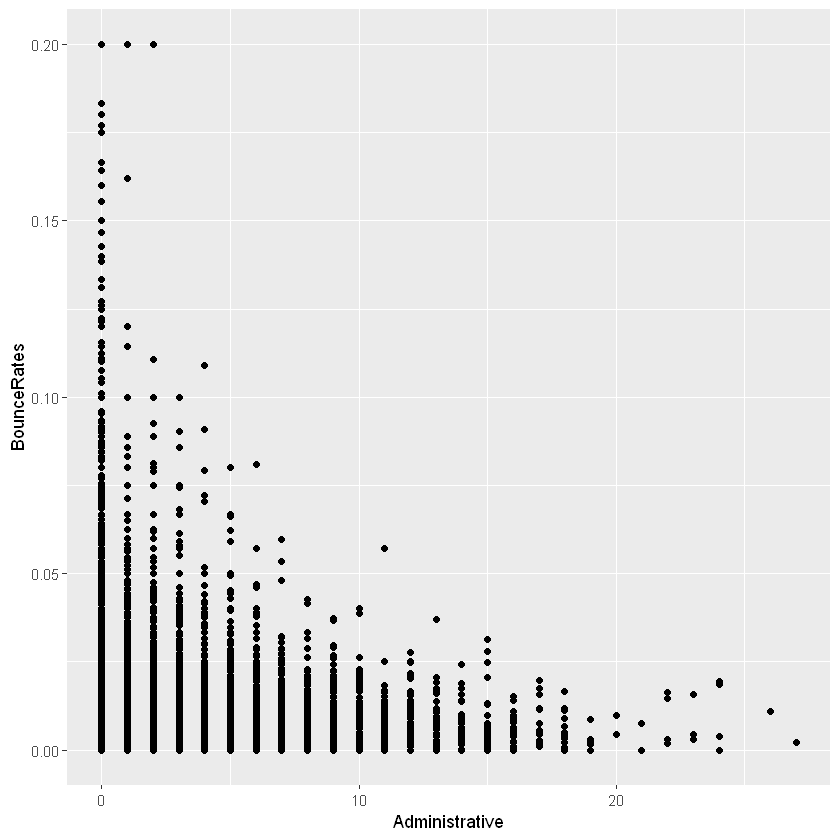

In [19]:
#Checking the bounce rates for pages 
ggplot(df1, aes(x = Administrative, y = BounceRates)) +
  geom_point(aes())
  
#The bounce for the administration page is higher for page 10 and below 

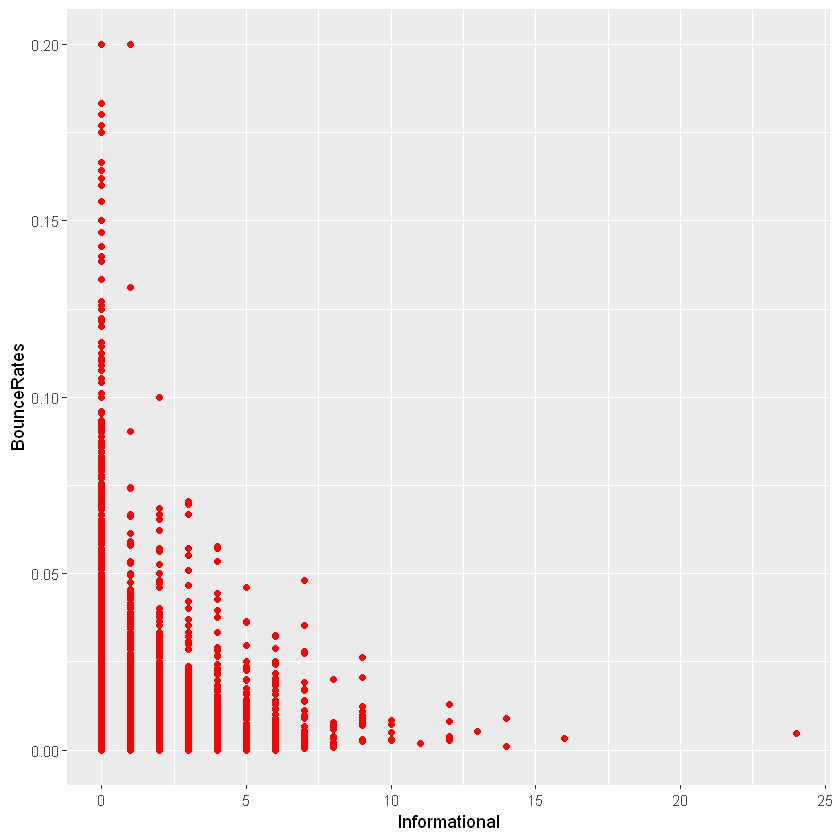

In [20]:
#Bounce rates for informational page 
ggplot(df1, aes(x = Informational, y = BounceRates)) +
  geom_point(color='red')

#The bounce rates are also higher for this page 

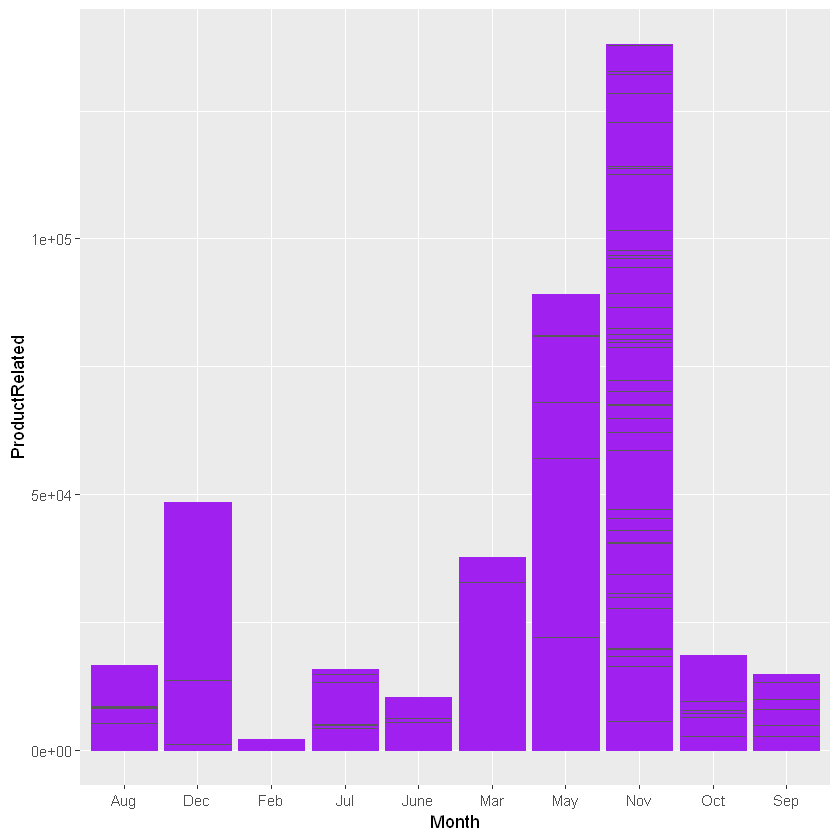

In [21]:
#comparing the product related site and the month customers visited 
ggplot(df1, aes(x=Month,y = ProductRelated)) +geom_bar(stat = "identity",color='purple')

#The Russian brand is located in countries in Europe and ASia 
#Europe and Asia experience the same climate change 
#Winter is in December - February
#Summer is in June - August
#Autumn is in September - November
#Spring is in March to May 

#More people would shop more during the month of May since they are in preparation for the summer season that is about to start
#November is also high since most of the promos are taking place then 

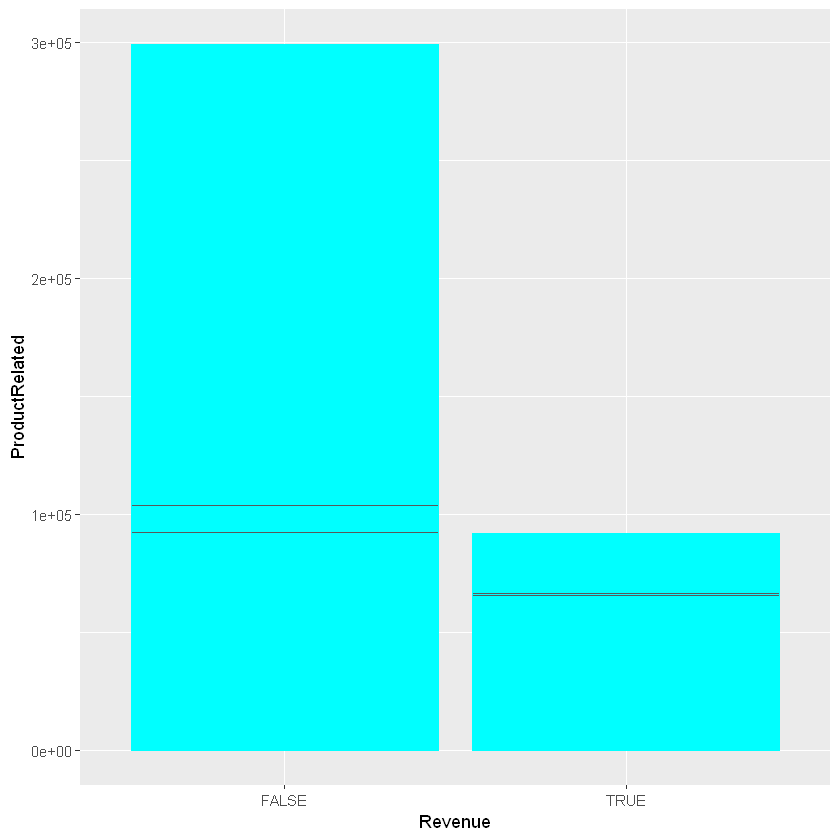

In [22]:
#people viewing the products and purchasing 
ggplot(df1, aes(x=Revenue,y = ProductRelated)) +geom_bar(stat = "identity",color='cyan')

#majority of the people that view the products do not purchase from the site 
#People could be clicking to admire the outfits,see the price range or just to steal design ideas

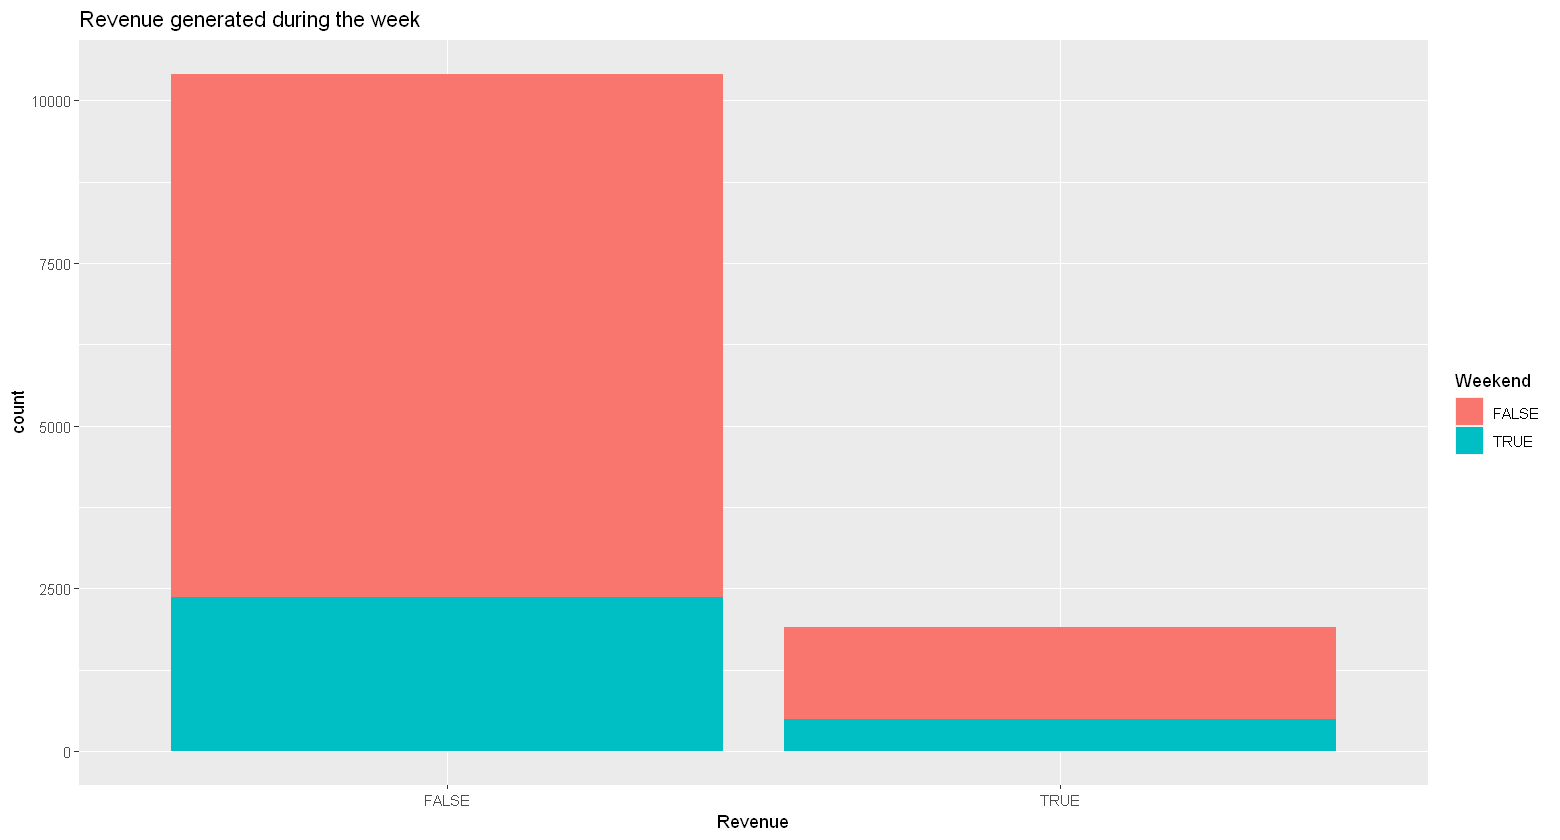

In [23]:
#Revenue generated during the week 
options(repr.plot.width = 13, repr.plot.height = 7)
g <- ggplot(df1, aes(Revenue))
g + geom_bar(aes(fill = Weekend)) + ggtitle("Revenue generated during the week") + xlab("Revenue") 

#The company generates more money during the weekdays compared to the weekends 

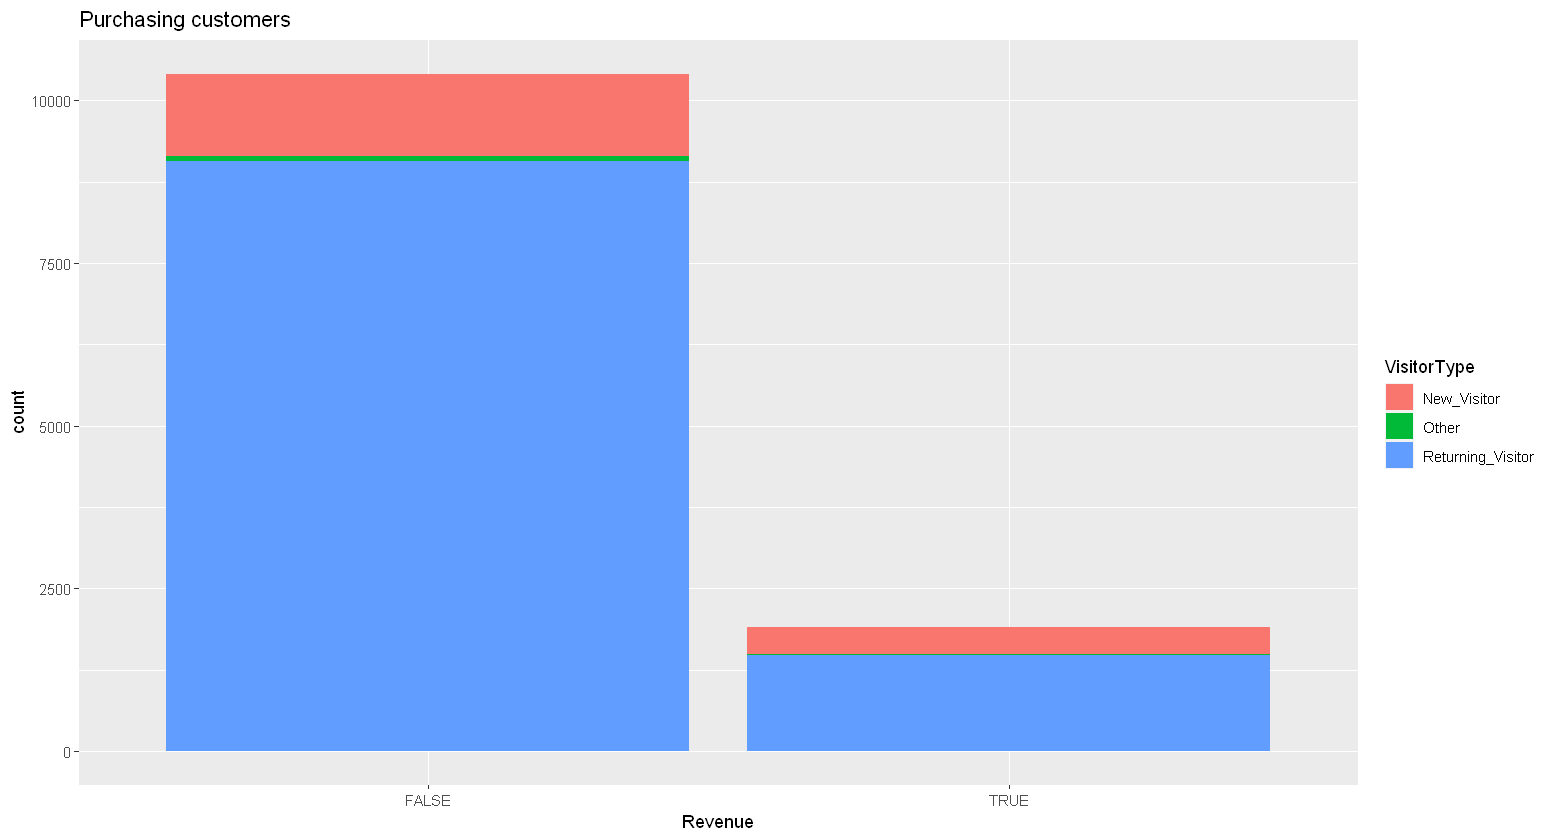

In [24]:
#Checking who mostly purchases from the site
options(repr.plot.width = 13, repr.plot.height = 7)
g <- ggplot(df1, aes(Revenue))
g + geom_bar(aes(fill = VisitorType)) + ggtitle("Purchasing customers") + xlab("Revenue") 
#Most of the people purchasing are new customers
#a bigger ratio is purchasing compared to the returning customers
#However,its alarming how majority of them do not purchase


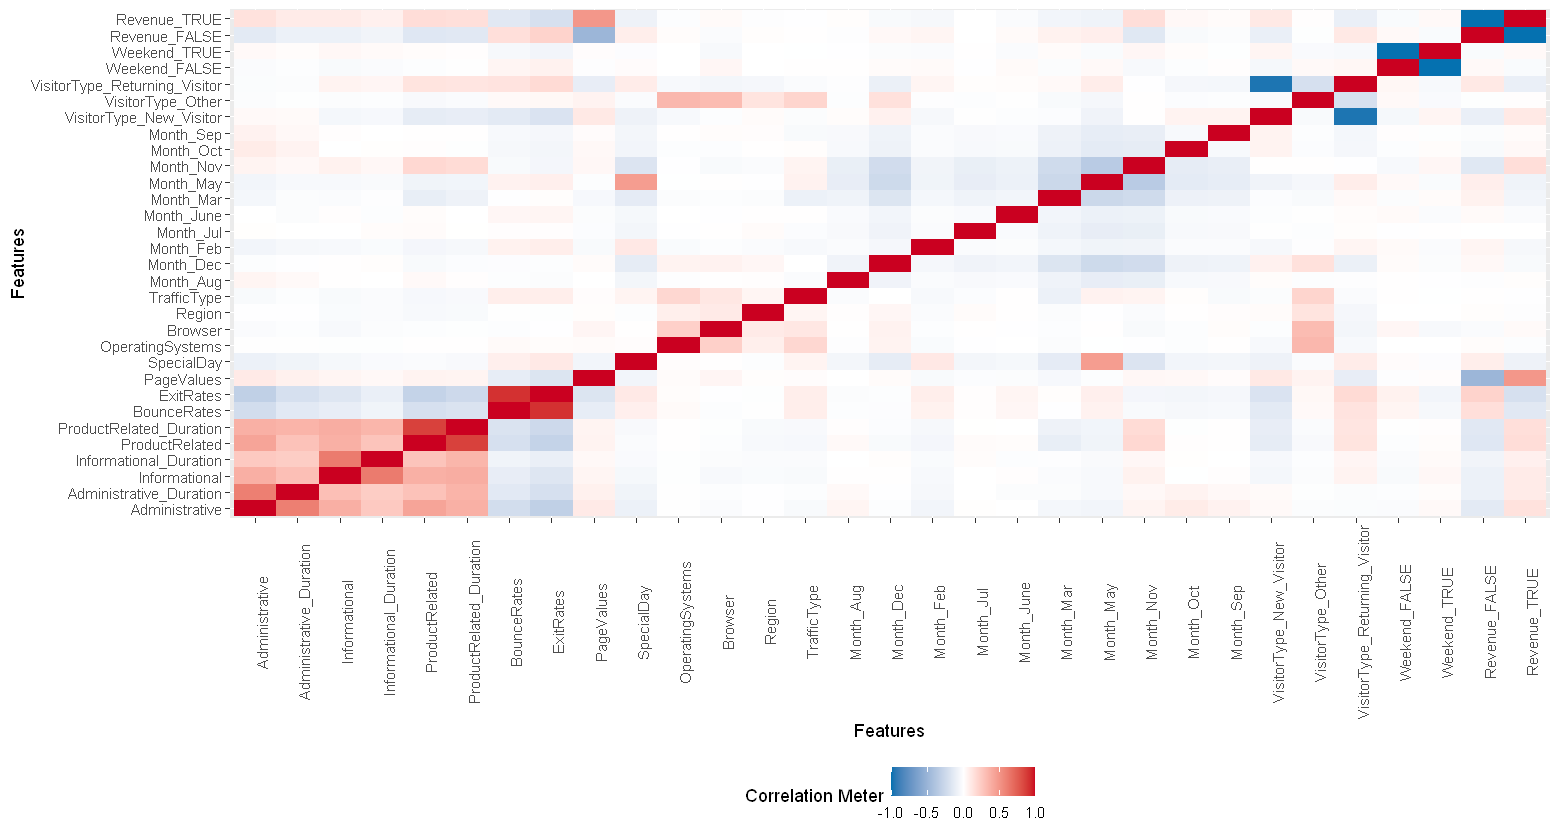

In [25]:
#correlation
plot_correlation(df1)

# Encoding 

In [26]:
#install package
install.packages("dplyr")


  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  0.8.4  0.8.5              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Maureen M\Anaconda3\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Maureen M\Anaconda3\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\Maureen M\AppData\Local\Temp\RtmpMXRrIj\downloaded_packages


In [28]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [29]:
#manual encoding 
Monthh = data.frame(model.matrix(~0+df1$Month))
VisitorTypee = data.frame(model.matrix(~0+df1$VisitorType))
Weekendd = data.frame(model.matrix(~0+df1$Weekend))
Revenuee = data.frame(model.matrix(~0+df1$Revenue))

# Dropping columns which have already encoded
drop_cols = c('Month', 'VisitorType','Weekend','Revenue')
df1 = select(data.frame(cbind(df1,Monthh, VisitorTypee,Weekendd,Revenuee)), -drop_cols)

Note: Using an external vector in selections is ambiguous.
i Use `all_of(drop_cols)` instead of `drop_cols` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


In [30]:
#view all the columns 
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [31]:
#viewing if the label encoding has worked 
head(df1)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,df1.MonthAug,df1.MonthDec,df1.MonthFeb,df1.MonthJul,df1.MonthJune,df1.MonthMar,df1.MonthMay,df1.MonthNov,df1.MonthOct,df1.MonthSep,df1.VisitorTypeNew_Visitor,df1.VisitorTypeOther,df1.VisitorTypeReturning_Visitor,df1.WeekendFALSE,df1.WeekendTRUE,df1.RevenueFALSE,df1.RevenueTRUE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0


# Modelling 

## K-means

In [32]:
#view all the column names
colnames(df1)

[1] "Administrative"                   "Administrative_Duration"         
 [3] "Informational"                    "Informational_Duration"          
 [5] "ProductRelated"                   "ProductRelated_Duration"         
 [7] "BounceRates"                      "ExitRates"                       
 [9] "PageValues"                       "SpecialDay"                      
[11] "OperatingSystems"                 "Browser"                         
[13] "Region"                           "TrafficType"                     
[15] "df1.MonthAug"                     "df1.MonthDec"                    
[17] "df1.MonthFeb"                     "df1.MonthJul"                    
[19] "df1.MonthJune"                    "df1.MonthMar"                    
[21] "df1.MonthMay"                     "df1.MonthNov"                    
[23] "df1.MonthOct"                     "df1.MonthSep"                    
[25] "df1.VisitorTypeNew_Visitor"       "df1.VisitorTypeOther"            
[27] "df1.VisitorTypeReturning_Visitor" "df1.WeekendFALSE"                
[29] "df1.WeekendTRUE"                  "df1.RevenueFALSE"                
[31] "df1.RevenueTRUE"

In [33]:
#normalize the data                          
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

df1$Administrative<- normalize(df1$Administrative)
df1$Administrative_Duration<- normalize(df1$Administrative_Duration)
df1$Informational<- normalize(df1$Informational)
df1$Informational_Duration<- normalize(df1$Informational_Duration)
df1$ProductRelated<- normalize(df1$ProductRelated)
df1$ProductRelated_Duration<- normalize(df1$ProductRelated_Duration)
df1$BounceRates<- normalize(df1$BounceRates)
df1$ExitRates<- normalize(df1$ExitRates)
df1$PageValues<- normalize(df1$PageValues) 
df1$SpecialDay<- normalize(df1$SpecialDay)
df1$OperatingSystems<- normalize(df1$OperatingSystems)
df1$Browser<- normalize(df1$Browser)
df1$Region<- normalize(df1$Region)
df1$TrafficType<- normalize(df1$TrafficType)
df1$df1.MonthAug<- normalize(df1$df1.MonthAug)
df1$df1.MonthDec<- normalize(df1$df1.MonthDec)
df1$df1.MonthFeb<- normalize(df1$df1.MonthFeb)
df1$df1.MonthJul<- normalize(df1$df1.MonthJul)
df1$df1.MonthJune<- normalize(df1$df1.MonthJune)
df1$df1.MonthMar<- normalize(df1$df1.MonthMar)
df1$df1.MonthMay<- normalize(df1$df1.MonthMay)
df1$df1.MonthNov<- normalize(df1$df1.MonthNov)
df1$df1.MonthOct<- normalize(df1$df1.MonthOct)
df1$df1.MonthSep<- normalize(df1$df1.MonthSep)
df1$df1.VisitorTypeNew_Visitor<- normalize(df1$df1.VisitorTypeNew_Visitor)
df1$df1.VisitorTypeOther<- normalize(df1$df1.VisitorTypeOther)
df1$df1.VisitorTypeReturning_Visitor<- normalize(df1$df1.VisitorTypeReturning_Visitor)
df1$df1.WeekendFALSE<- normalize(df1$df1.WeekendFALSE)
df1$df1.WeekendTRUE<- normalize(df1$df1.WeekendTRUE)
df1$df1.RevenueFALSE<- normalize(df1$df1.RevenueFALSE)
df1$df1.RevenueTRUE<- normalize(df1$df1.RevenueTRUE)
head(df1)                       

#the data has been put in a common scale between 0 and 1

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,df1.MonthAug,df1.MonthDec,df1.MonthFeb,df1.MonthJul,df1.MonthJune,df1.MonthMar,df1.MonthMay,df1.MonthNov,df1.MonthOct,df1.MonthSep,df1.VisitorTypeNew_Visitor,df1.VisitorTypeOther,df1.VisitorTypeReturning_Visitor,df1.WeekendFALSE,df1.WeekendTRUE,df1.RevenueFALSE,df1.RevenueTRUE
0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,0.0000000,0.00000000,0.000,0.00000000,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,0.1428571,0.08333333,0.000,0.05263158,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,0.4285714,0.00000000,1.000,0.10526316,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,0.2857143,0.08333333,0.125,0.15789474,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,0.2857143,0.16666667,0.000,0.15789474,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,0.1428571,0.08333333,0.000,0.10526316,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [34]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3
result<- kmeans(df1,3) 
#view
result$size

[1] 2366 8042 1908

In [35]:
# Getting the value of cluster center datapoint value(3 centers for k=3)
result$centers 

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,df1.MonthAug,df1.MonthDec,df1.MonthFeb,df1.MonthJul,df1.MonthJune,df1.MonthMar,df1.MonthMay,df1.MonthNov,df1.MonthOct,df1.MonthSep,df1.VisitorTypeNew_Visitor,df1.VisitorTypeOther,df1.VisitorTypeReturning_Visitor,df1.WeekendFALSE,df1.WeekendTRUE,df1.RevenueFALSE,df1.RevenueTRUE
0.08501612,0.02423958,0.02299944,0.01488382,0.04335953,0.01746607,0.10470945,0.20729059,0.005154239,0.06289096,0.1623596,0.1003452,0.2680685,0.1602972,0.03550296,0.1382079,0.011411665,0.03719358,0.01775148,0.1745562,0.2603550,0.2455621,0.04818259,0.03127642,0.1580727,0.002535926,0.8393914,0.0000000,1.0000000,1,0
0.07663470,0.02135622,0.01762103,0.01148966,0.04001933,0.01655499,0.13275161,0.24509954,0.005562212,0.07018155,0.1611362,0.1150004,0.2705795,0.1626003,0.03394678,0.1472271,0.019149465,0.03456852,0.02698334,0.1602835,0.2961950,0.2060433,0.03979110,0.03581199,0.1116638,0.007833872,0.8805024,1.0000000,0.0000000,1,0
0.12568911,0.03543885,0.03275681,0.02298149,0.06838322,0.02934308,0.02558576,0.09777584,0.075365536,0.02316562,0.1561096,0.1211129,0.2602856,0.1590257,0.03983229,0.1132075,0.001572327,0.03459119,0.01519916,0.1006289,0.1912998,0.3983229,0.06027254,0.04507338,0.2211740,0.008385744,0.7704403,0.7384696,0.2615304,0,1


In [36]:
# Getting the cluster vector that shows the cluster where each record falls
result$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     1     2     2     1     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     2     1     2     2     1     2     2     2     1     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     2     1     2     2     2     2     1     2     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     2     2     2     2     2     2     2     2     2     2     1     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     2     2     2     2     2     2     2     2     2     2     1     2 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    3     2     2     2     2     2     2     2     2     2     2     3     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     2     1     2     2     2     1     2     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    1     2     2     2     2     2     2     2     2     2     3     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     2     2     2     2     2     2     2     2     2     2     1     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     2     2     2     2     2     2     2     2     2     2     2     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     2     2     2     2     2     2     2     2     1 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    1     1     2     2     2     1     1     2     2     2     2     2     2 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    1     1     2     2     1     1     2     2     2     2     2     1     2 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    2     1     2     2     2     1     3     2     2     2     2     2     1 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    2     3     2     3     3     3     1     2     2     2     2     3     1 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     2     2     2     2     1     2     2     2     2     2     2     3 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    2     2     2     2     1     2     2     3     2     1     2     1     1 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    1     2     1     1     1     2     2     2     2     1     2     2     2 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    2     3     1     1     2     2     2     1     2     2     2     2     2 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    1     2     3     2     2     3     2     2     2     1     1     2     2 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    2     1     2     3     2     2     2     1     3     2     2     2     2 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    2     2     2     2     2     2     2     1     3     3     2     2     2 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    2     1     1     2     2     2     2     1     2     2     1     2     1 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     2     2     2     2     2     2     2     3     2     2     2     2 
  326   327   328   329   330   331   332   333   334 

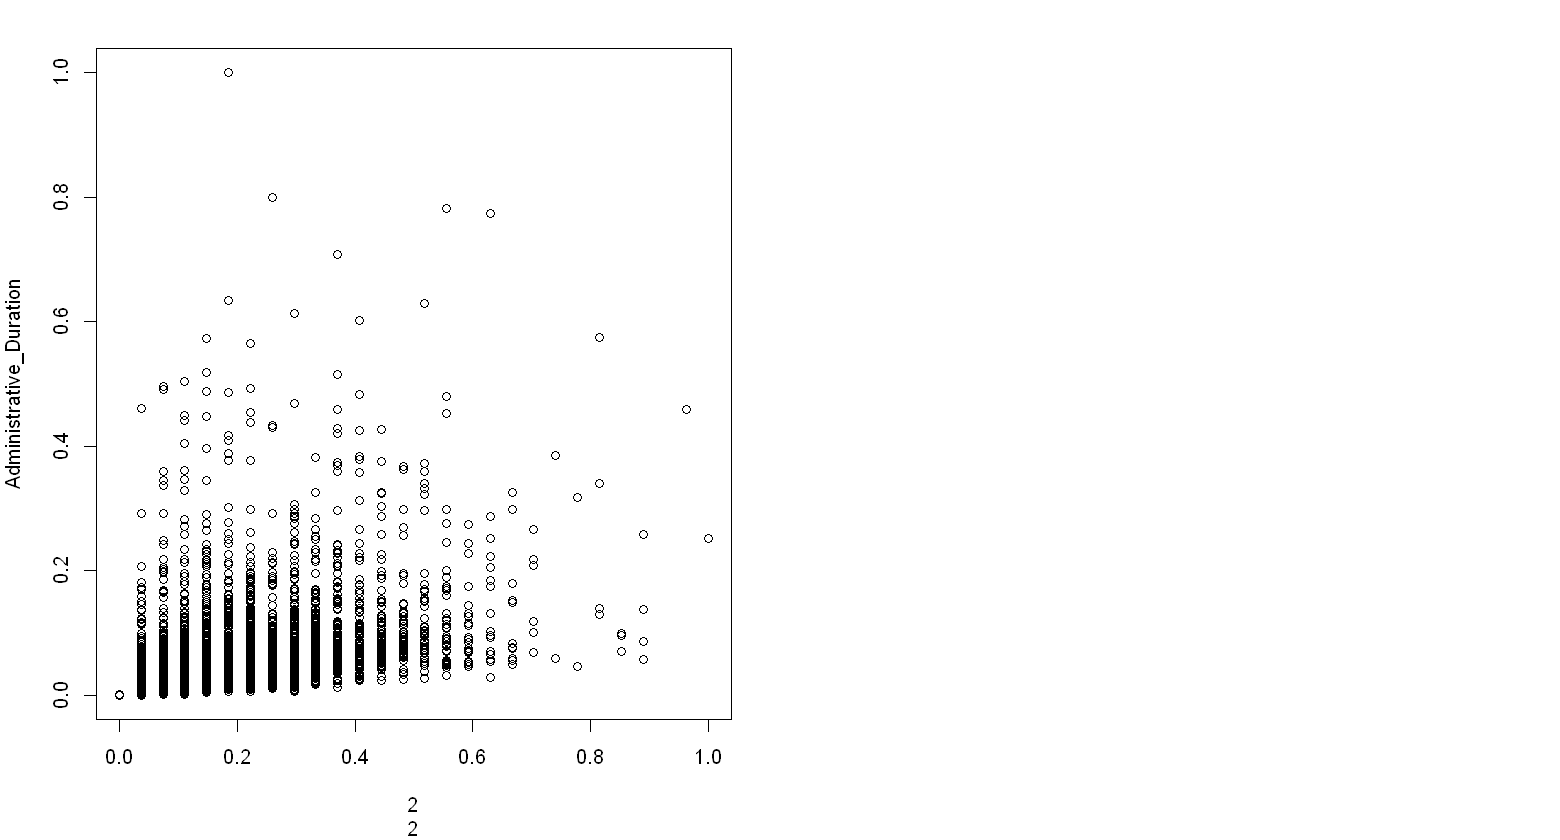

In [37]:
# Visualizing the  clustering results
par(mfrow = c(1,2), mar = c(5,4,2,2))
plot(df1[c(1,2)],result$cluster)

In [38]:
#import package
install.packages("GGally")

package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maureen M\AppData\Local\Temp\RtmpMXRrIj\downloaded_packages


In [39]:
#read the library
library(GGally)

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



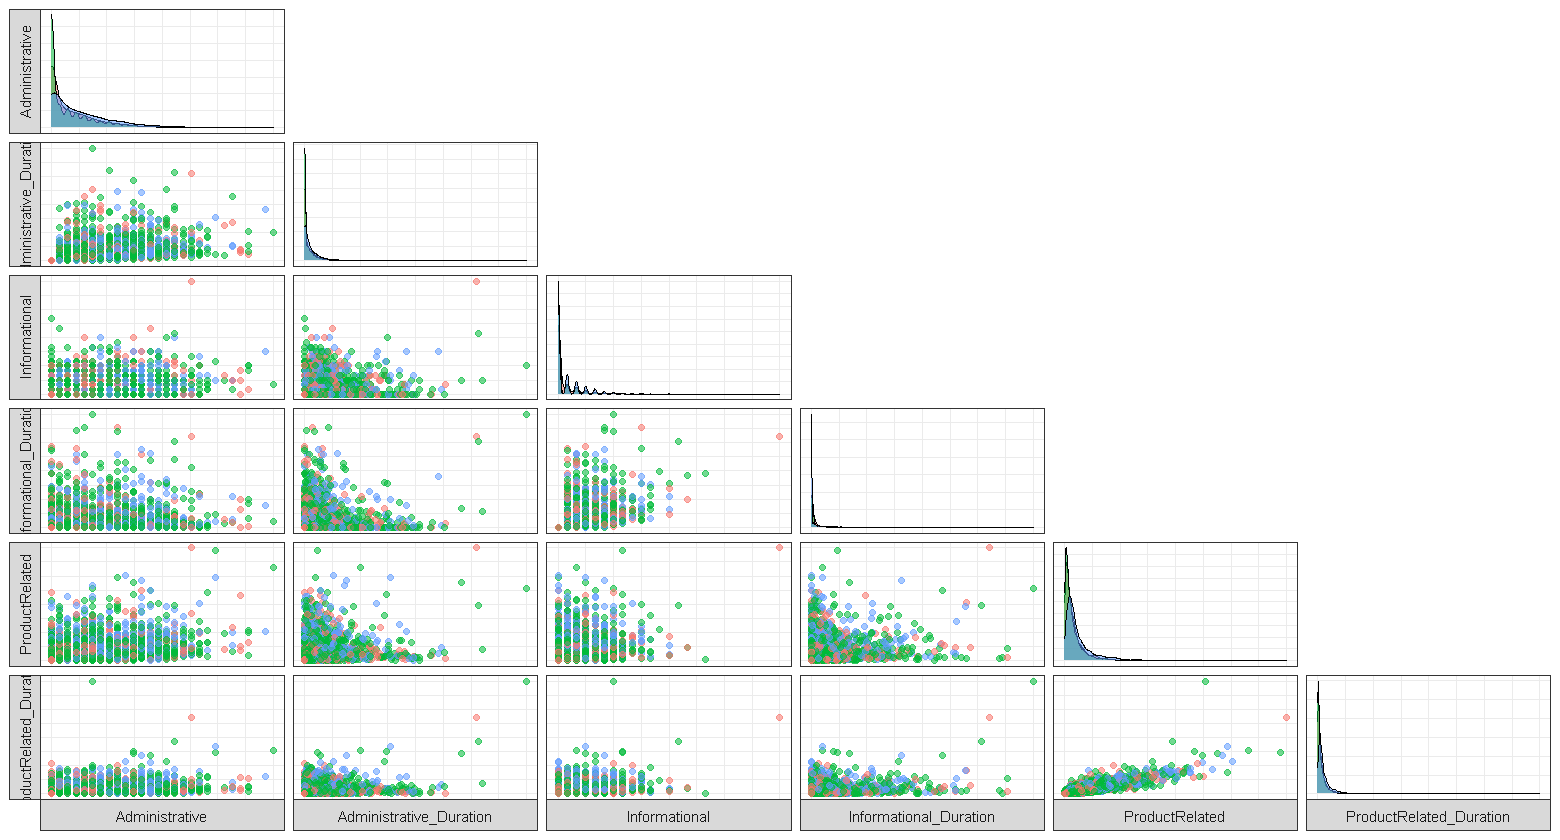

In [40]:
# Verifying the results of clustering
# ---
# 
ggpairs(cbind(df1, Cluster=as.factor(result$cluster)),
        columns=1:6, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") +
        theme_bw()

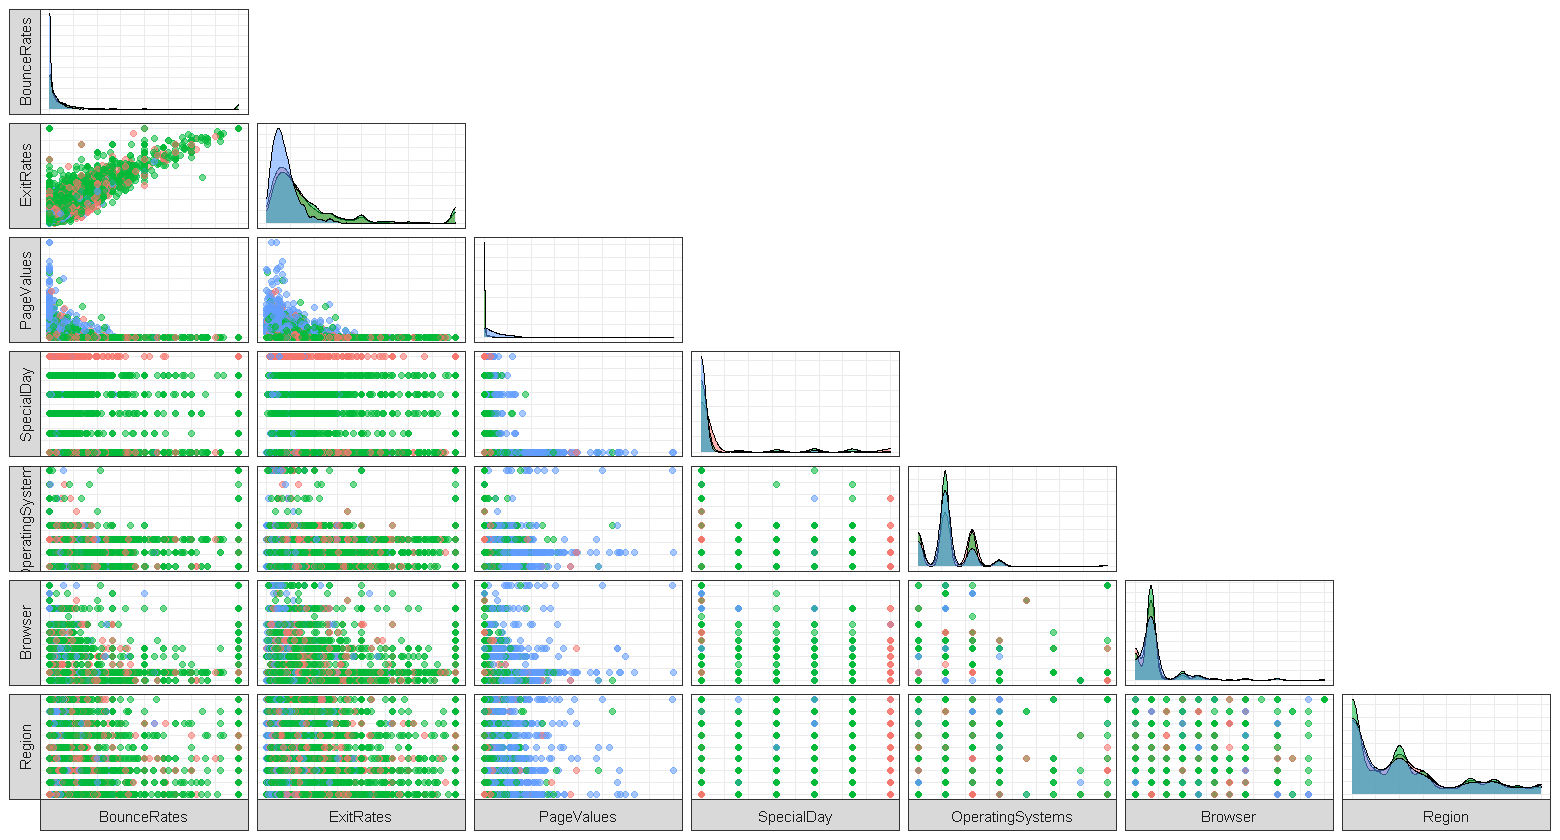

In [41]:
#
ggpairs(cbind(df1, Cluster=as.factor(result$cluster)),
        columns=7:13, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") +
        theme_bw()

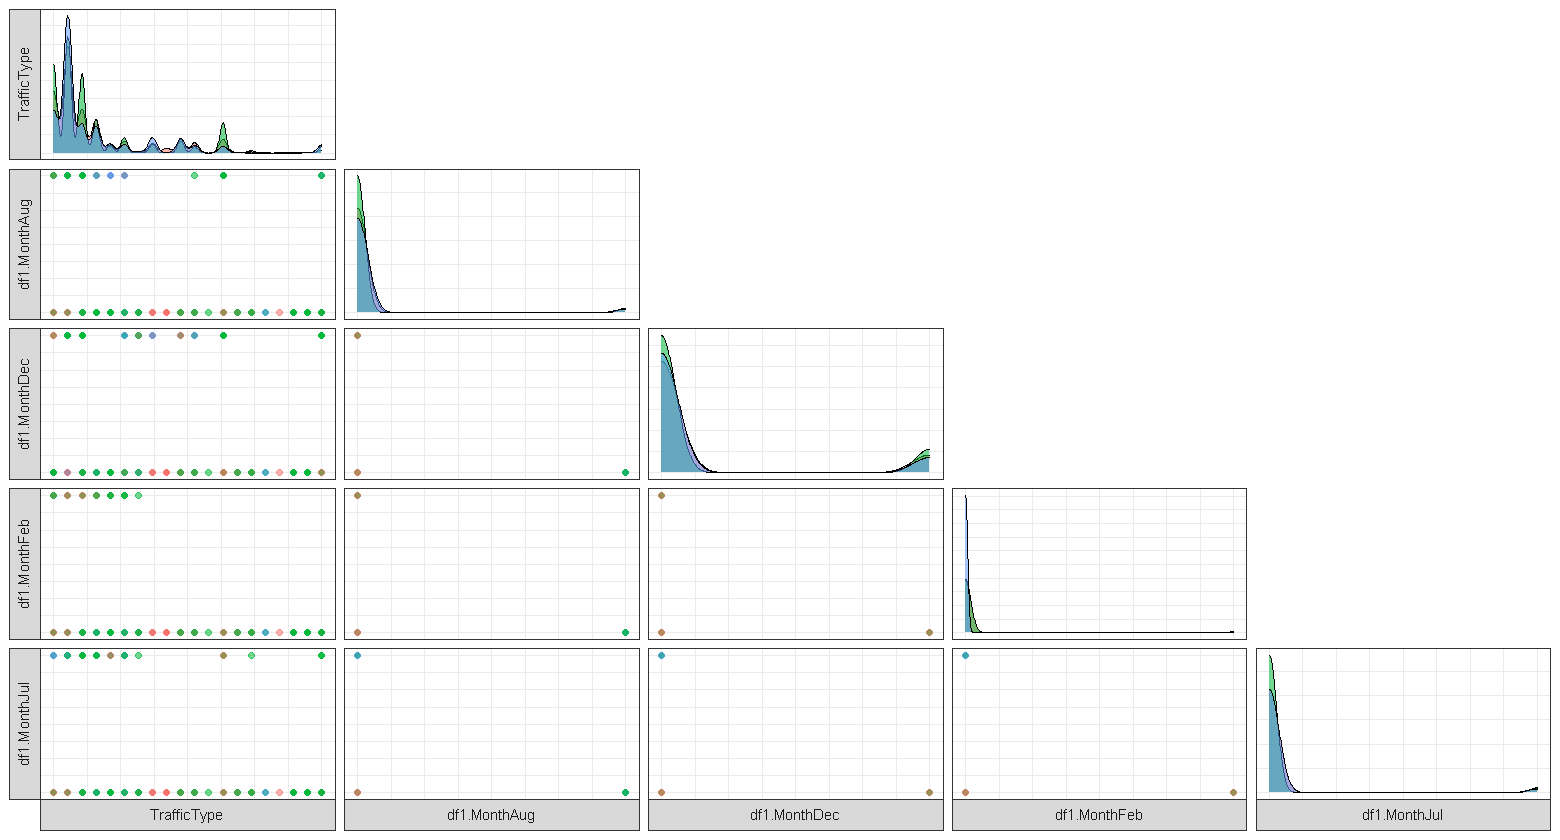

In [42]:
ggpairs(cbind(df1, Cluster=as.factor(result$cluster)),
        columns=14:18, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") +
        theme_bw()

## Hierachy

Most clustering techniques including hierarchical clustering do not perform well on data with many predictive variables. This is due to the curse of dimensionality. To address this, we can perform Prinicpal Component Analysis prior to performing hierarchical clustering in order to reduce the dimensionality of our data.

### PCA 

In [43]:
colnames(df1)

[1] "Administrative"                   "Administrative_Duration"         
 [3] "Informational"                    "Informational_Duration"          
 [5] "ProductRelated"                   "ProductRelated_Duration"         
 [7] "BounceRates"                      "ExitRates"                       
 [9] "PageValues"                       "SpecialDay"                      
[11] "OperatingSystems"                 "Browser"                         
[13] "Region"                           "TrafficType"                     
[15] "df1.MonthAug"                     "df1.MonthDec"                    
[17] "df1.MonthFeb"                     "df1.MonthJul"                    
[19] "df1.MonthJune"                    "df1.MonthMar"                    
[21] "df1.MonthMay"                     "df1.MonthNov"                    
[23] "df1.MonthOct"                     "df1.MonthSep"                    
[25] "df1.VisitorTypeNew_Visitor"       "df1.VisitorTypeOther"            
[27] "df1.VisitorTypeReturning_Visitor" "df1.WeekendFALSE"                
[29] "df1.WeekendTRUE"                  "df1.RevenueFALSE"                
[31] "df1.RevenueTRUE"

In [44]:
#PERFORM PCA
df1.pca <- prcomp(df1[,18:length(colnames(df1))], center = T)

In [45]:
#get the varibles that PCA that found 
names(df1.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [46]:
#
head(df1.pca$x)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
-0.3836094,-0.09533534,-0.1971402,-0.10671965,0.08297350,-0.2992697,0.05110027,-0.006999324,-0.09888189,0.2007252,0.05421230,-6.285771e-15,-1.249001e-15,1.056880e-15
-0.3836094,-0.09533534,-0.1971402,-0.10671965,0.08297350,-0.2992697,0.05110027,-0.006999324,-0.09888189,0.2007252,0.05421230,-6.285771e-15,-1.249001e-15,1.056880e-15
-0.3836094,-0.09533534,-0.1971402,-0.10671965,0.08297350,-0.2992697,0.05110027,-0.006999324,-0.09888189,0.2007252,0.05421230,-6.285771e-15,-1.249001e-15,1.056880e-15
-0.3836094,-0.09533534,-0.1971402,-0.10671965,0.08297350,-0.2992697,0.05110027,-0.006999324,-0.09888189,0.2007252,0.05421230,-6.285771e-15,-1.249001e-15,1.056880e-15
0.9534566,-0.54802139,-0.2106573,-0.02856906,0.08588547,-0.3253650,0.06211381,-0.002850168,-0.11095010,0.2046551,0.04709246,-6.427150e-15,-1.360023e-15,-5.354658e-15
-0.3836094,-0.09533534,-0.1971402,-0.10671965,0.08297350,-0.2992697,0.05110027,-0.006999324,-0.09888189,0.2007252,0.05421230,-6.285771e-15,-1.249001e-15,1.056880e-15


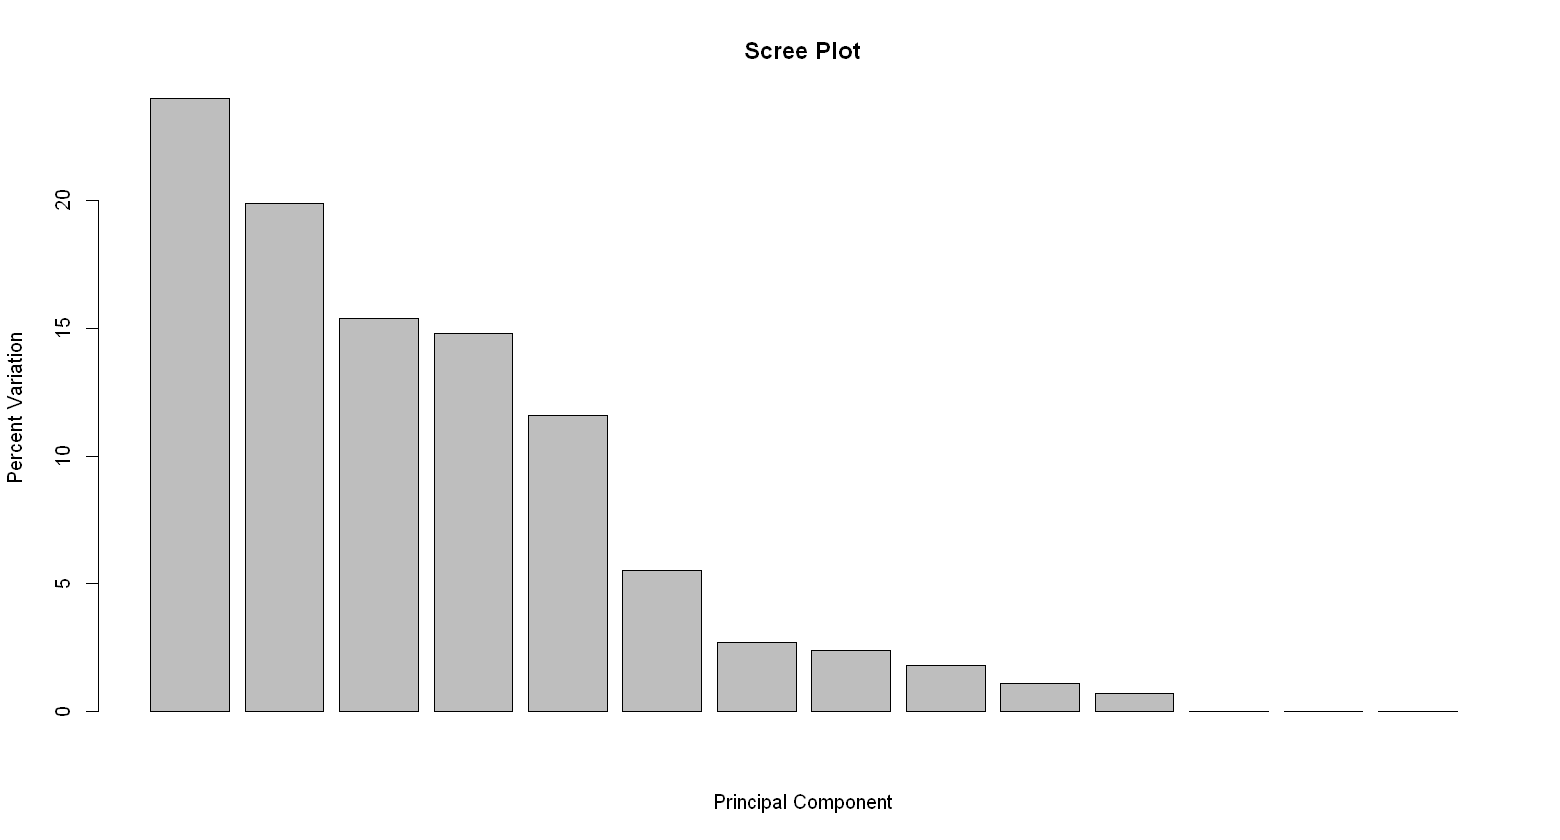

In [50]:
#Determining the number of principal components to use
#WE shall not use all the variables PCA has choosen 
#We shall check the variance 
pca.var <- df1.pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100,1)
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

In [55]:
#checking the variance
(x <- cbind(1:length(pca.var.per),cumsum(pca.var.per)))[x[,1] == 5,]

[1]  5.0 85.7

In [56]:
## Perform the hierachy clustering 
hclust.out <- hclust(dist(as.matrix(df1.pca$x[,1:8])),  method = "complete")

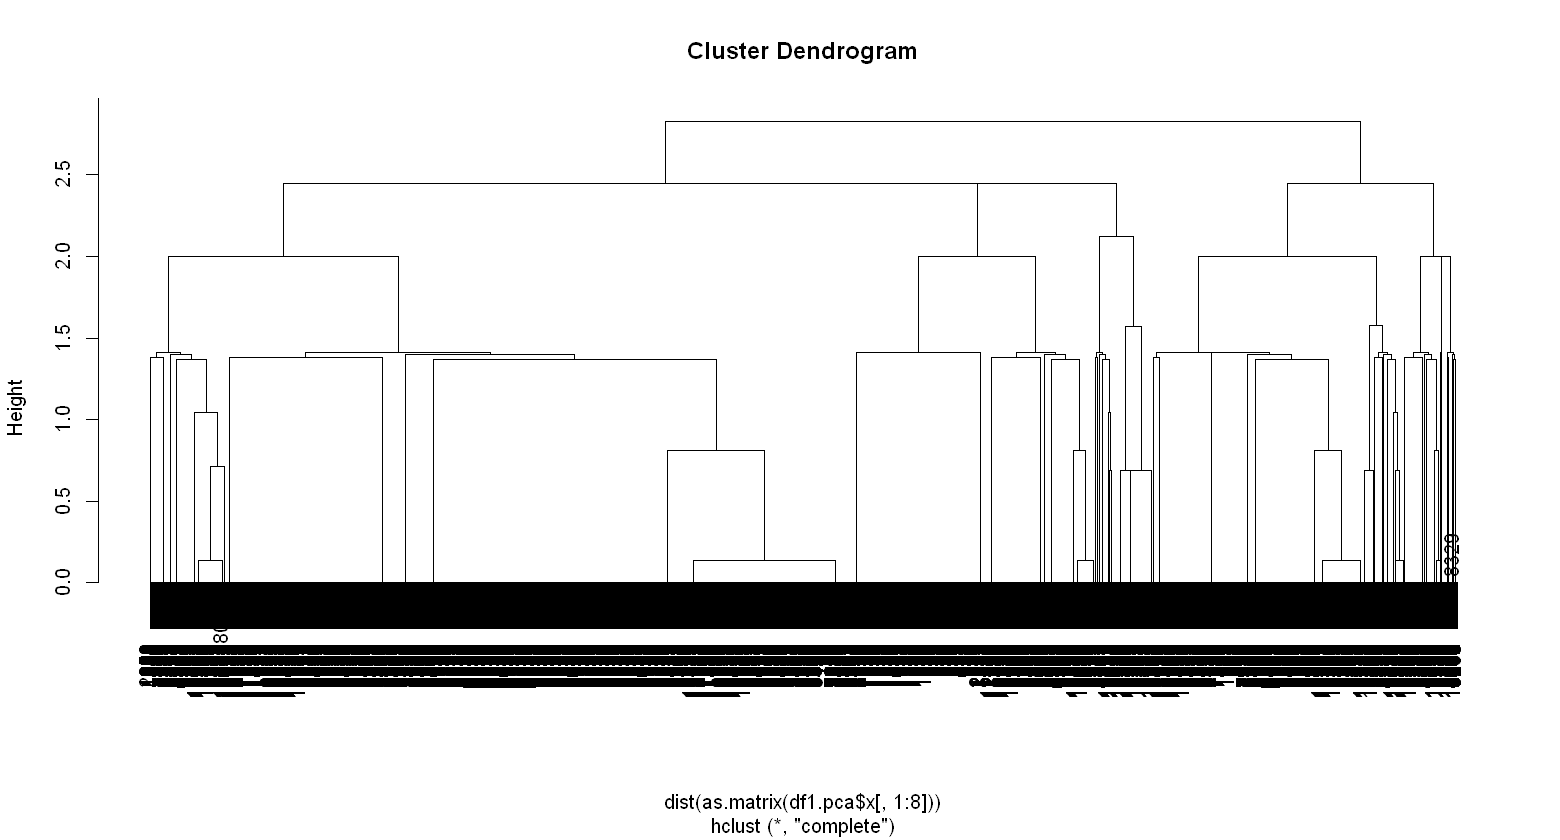

In [57]:
#resulting dendogram
plot(hclust.out)

In [58]:
#the function cutree helps determine the number of clusters it shall form
clust_4 <- cutree(hclust.out, k = 4)

In [59]:
#check the clusters 
table(clust_4)

clust_4
   1    2    3    4 
6652 2366 2799  499 

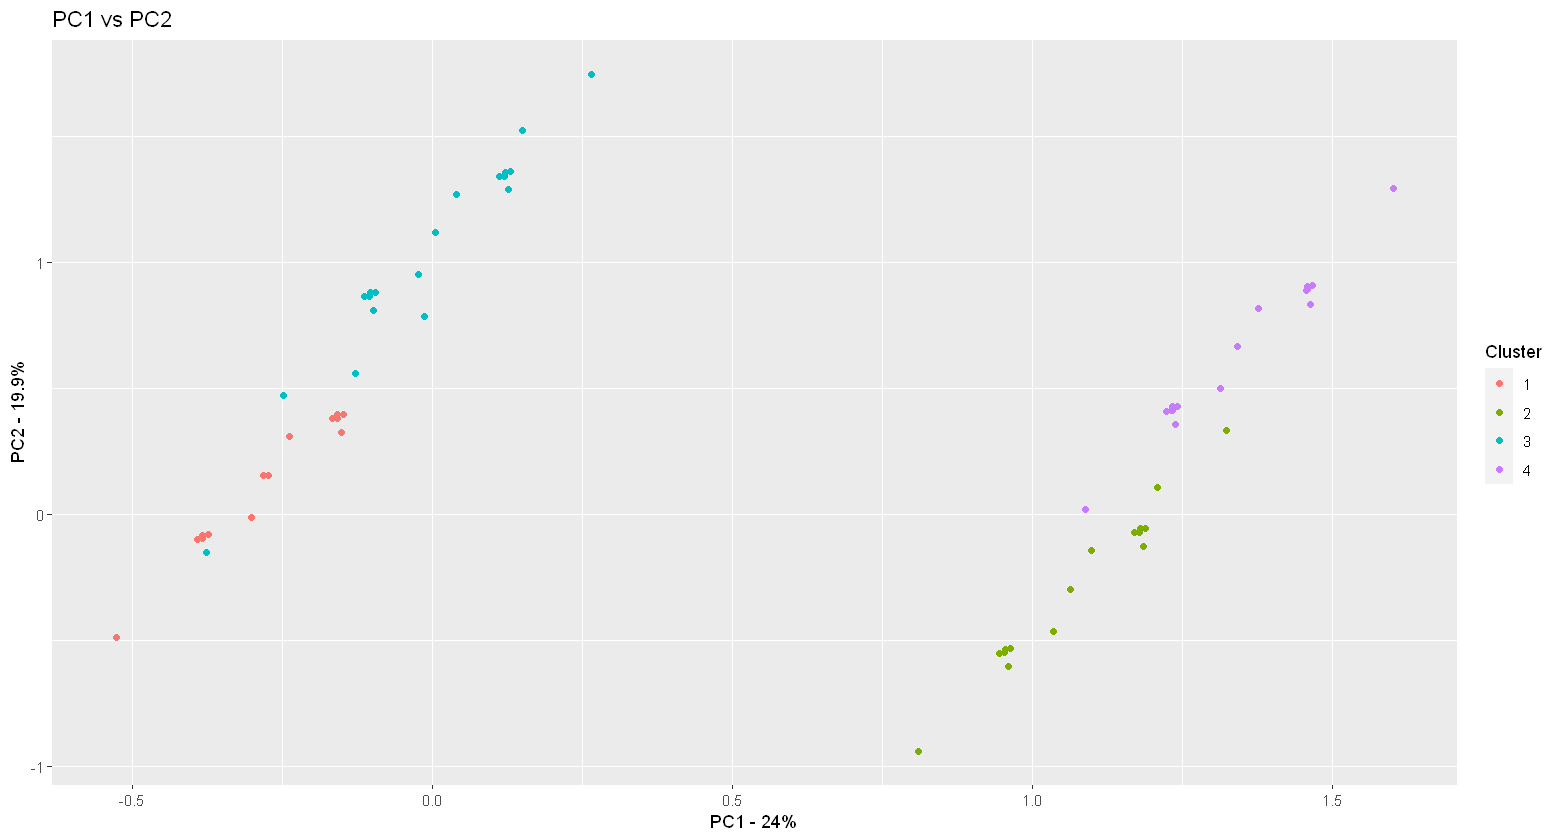

In [60]:
#plot 
df1.pca.data <- data.frame(Cluster=as.factor(clust_4),
                         X=df1.pca$x[,1],
                         Y=df1.pca$x[,2])

ggplot(data=df1.pca.data, aes(x=X,y=Y,col=Cluster)) +
  geom_point() +
  xlab(paste0("PC1 - ", pca.var.per[1], "%")) +
  ylab(paste0("PC2 - ", pca.var.per[2], "%")) +
  ggtitle("PC1 vs PC2")

# Advantages of K- means

1. The code takes longer to run

# Disadvantantages of K-means

1. There is specific k to use to optimize for the clusters

# Advantages of Hierachical

1. it is faster since you do not use all the variables

# Disadvantages of Hierachical 

1. There is no mathematical objective for Hierarchical clustering

# Conclusion

1. Most returning customers are not purchasing since the website has the same clothes over a long time
2. People are mostly purchasing before special events 
3. People purchase also before seasons like summer 

# Recommendation

1. Bring in new clothes for the returning customers. (Update their website oftenly)
2. Give oofers from time to time.This increases there sales 
